In [1]:
import pandas as pd
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
import pickle

In [5]:
#Read our decision Matrix
data = pd.read_csv("Data/Matrix.csv")
data.head(10)

,Node,DC,CC,BC,EC
0,0,0.085934,0.353343,1.463059e-01,3.391796e-05
1,1,0.004210,0.261376,2.783274e-06,6.045346e-07
2,2,0.002476,0.261258,7.595021e-08,2.233461e-07
3,3,0.004210,0.261376,1.685066e-06,6.635648e-07
4,4,0.002476,0.261258,1.840332e-07,2.236416e-07
5,5,0.003219,0.261308,2.205964e-06,1.183322e-06
6,6,0.001486,0.261190,2.453776e-08,2.170904e-07
7,7,0.004953,0.274769,1.702985e-04,2.568510e-05
8,8,0.001981,0.261224,2.760498e-07,2.197375e-07
9,9,0.014116,0.262055,1.645424e-05,2.214117e-06


In [6]:
X = data[["DC","BC","CC","EC"]]
#pca = PCA(2)
X

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [7]:
#read the 10 influential nodes
influential = pd.read_csv("Data/res.csv")
inf10 = influential.head(10)
inf10

,Node,DC,BC,CC,EC,S+,S-,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,0.019029,0.200396,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,0.061948,0.141539,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,0.102563,0.100961,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,0.103349,0.098846,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0.140349,0.061395,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,0.142845,0.060458,0.297379
6,698,0.016840,0.115330,0.271189,1.116876e-09,0.155715,0.046803,0.231106
7,567,0.015602,0.096310,0.328881,9.932295e-06,0.163087,0.039165,0.193646
8,58,0.002972,0.084360,0.397402,5.898120e-04,0.168330,0.034346,0.169464
9,428,0.028479,0.064309,0.394837,5.990065e-04,0.174851,0.026805,0.132923


In [8]:
#convert it to numpy array
Y = inf10[["DC","BC","CC","EC"]]
Yrr = Y.to_numpy()
Yrr

array([[2.58791481e-01, 4.80518079e-01, 4.59699454e-01, 2.60693991e-04],
       [1.96136701e-01, 3.37797450e-01, 3.93605615e-01, 7.16425979e-06],
       [1.86973749e-01, 2.29295340e-01, 3.50947332e-01, 9.54069615e-02],
       [1.35463101e-01, 2.36115357e-01, 3.14412520e-01, 9.53161293e-08],
       [8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [1.63447251e-02, 1.49015092e-01, 3.57851826e-01, 3.16408207e-06],
       [1.68400198e-02, 1.15330450e-01, 2.71188717e-01, 1.11687629e-09],
       [1.56017831e-02, 9.63103312e-02, 3.28880925e-01, 9.93229483e-06],
       [2.97176820e-03, 8.43602059e-02, 3.97401831e-01, 5.89812015e-04],
       [2.84794453e-02, 6.43090624e-02, 3.94837196e-01, 5.99006469e-04]])

In [9]:
# Sum_of_squared_distances = []
# K = range(1,20)
# for k in K:
#     km = KMeans(n_clusters=k, n_init=1000)
#     km = km.fit(X)
#     Sum_of_squared_distances.append(km.inertia_)

In [10]:
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [11]:
kmeans = KMeans(n_clusters=10, max_iter=20000, n_init=1, random_state=0)

In [12]:
#Communities
label=kmeans.fit_predict(X)
for i in (label):
    print(i)

5
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
2
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
6
8
8
8
8
8
0
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
7
0
8
7
8
8
0
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
0
8
8
8
0
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
0
8
6
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
0
8
8
8
8
8
8
0
8
8
8
8
8
8
7
8
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
8
8
8
8
8
8
8
8
6
8
0
0
8
6
8
8
8
0
8
8
2
8
8
6
0
8
6
0
0
0
2
8
8
2
2
8
6
8
7
8
8
8
8
8
8
0
8
2
0
2
8
2
2
0
0
2
8
0
0
0
2
8
2
8
0
0
8
0
0
0
8
8
6
8
6
0
2
2
8
2
6
0
0
2
8
0
0
0
6
8
0
7
0
0
0
0
7
8
7
2
8
0
0
8
0
8
0
8
8
0
8
2
0
8
8
0
2
0
8
0
2
2
8
0
0
2
8
8
8
0
8
2
0
0
8
6
0
0
8
0
0
8
0
6
6
0
8
0
8
8
8
8
2
0
0
8
0
2
8
8


In [13]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['center'])
lab

,center
0,5
1,8
2,8
3,8
4,8
...,...
4034,4
4035,4
4036,4
4037,4


In [14]:
#Community of each Node
community = pd.concat([data, lab], axis=1)
community.head(20)

,Node,DC,CC,BC,EC,center
0,0,0.085934,0.353343,1.463059e-01,3.391796e-05,5
1,1,0.004210,0.261376,2.783274e-06,6.045346e-07,8
2,2,0.002476,0.261258,7.595021e-08,2.233461e-07,8
3,3,0.004210,0.261376,1.685066e-06,6.635648e-07,8
4,4,0.002476,0.261258,1.840332e-07,2.236416e-07,8
5,5,0.003219,0.261308,2.205964e-06,1.183322e-06,8
6,6,0.001486,0.261190,2.453776e-08,2.170904e-07,8
7,7,0.004953,0.274769,1.702985e-04,2.568510e-05,0
8,8,0.001981,0.261224,2.760498e-07,2.197375e-07,8
9,9,0.014116,0.262055,1.645424e-05,2.214117e-06,8


In [15]:
gk = community.groupby('center')
gk.first()

,Node,DC,CC,BC,EC
center,,,,,
0,7,0.004953,0.274769,0.000170,2.568510e-05
1,686,0.042100,0.216910,0.029722,9.353314e-12
2,34,0.001238,0.303313,0.003602,4.074185e-06
3,1917,0.047053,0.262993,0.000008,7.975544e-02
4,687,0.006934,0.178562,0.000004,7.184894e-13
5,0,0.085934,0.353343,0.146306,3.391796e-05
6,58,0.002972,0.397402,0.084360,5.898120e-04
7,21,0.016097,0.275613,0.000938,2.596576e-05
8,1,0.004210,0.261376,0.000003,6.045346e-07


In [16]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(10):
    comm.append(gk.get_group(i)['Node'].tolist())

In [17]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(Graph))

Graph with 4039 nodes and 88234 edges


C:\Users\DELL\AppData\Local\Temp\ipykernel_8752\2574413987.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(Graph))


In [18]:
size=[]
for i in range(10):
    sslist=[]
    for j in comm[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428]
        if j in list1:
            sslist.append(3150)
        else:
            sslist.append(70)
    size.append(sslist)

In [19]:
comm[1]

[686,
 697,
 703,
 708,
 713,
 719,
 729,
 745,
 747,
 753,
 769,
 772,
 774,
 776,
 798,
 800,
 803,
 804,
 805,
 810,
 811,
 819,
 823,
 825,
 828,
 830,
 840,
 856,
 858,
 859,
 861,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 3438,
 3439,
 3441,
 3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3449,
 3450,
 3451,
 3452,
 3453,
 3455,
 3457,
 3458,
 3459,
 3460,
 3461,
 3462,
 3463,
 3464,
 3465,
 3466,
 3467,
 3468,
 3469,
 3470,
 3471,
 3472,
 3473,
 3474,
 3475,
 3476,
 3477,
 3478,
 3479,
 3480,
 3481,
 3482,
 3483,
 3484,
 3485,
 3486,
 3488,
 3489,
 3490,
 3491,
 3492,
 3493,
 3494,
 3496,
 3497,
 3498,
 3499,
 3500,
 3502,
 3503,
 3504,
 3505,
 3506,
 3507,
 3508,
 3509,
 3510,
 3511,
 3512,
 3513,
 3514,
 3515,
 3516,
 3517,
 3518,
 3519,
 3520,
 3521,
 3522,
 3523,
 3524,
 3526,
 3527,
 3528,
 3529,
 3530,
 3531,
 3532,


In [20]:
keyList = inf10.Node.tolist()
myDict = {key: key for key in keyList}

In [21]:
with open('Data/networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

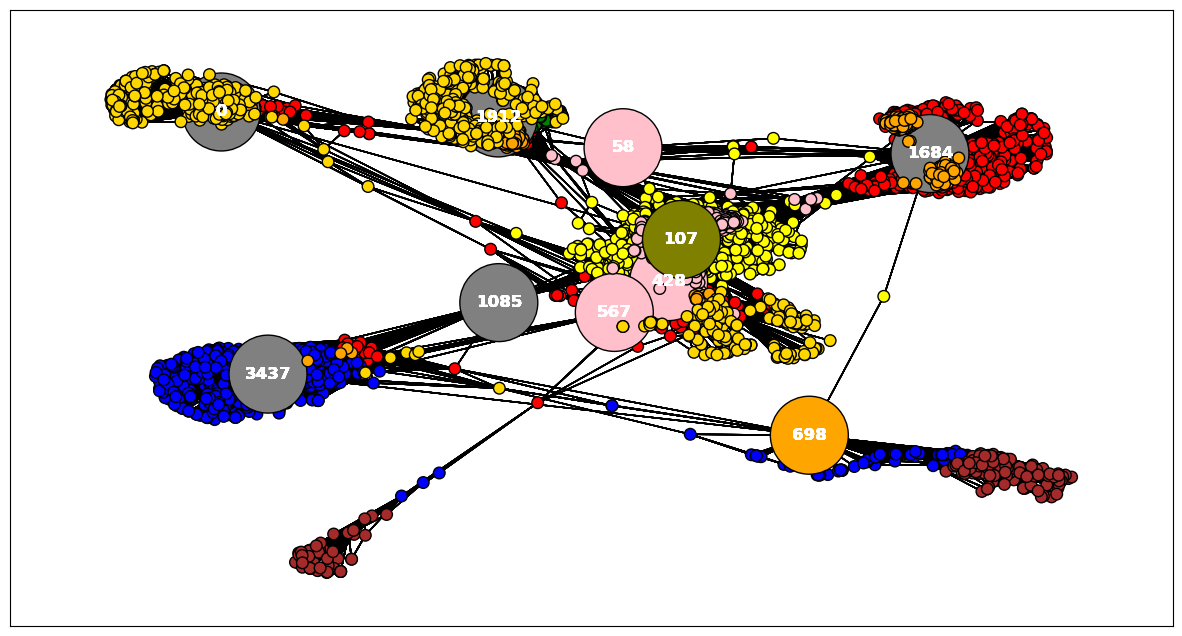

In [22]:
plt.rcParams.update({'figure.figsize': (15, 8)})
colors=['red','blue','yellow','green','brown','grey','pink','orange','gold','olive']
for i in range(10):
    nx.draw_networkx(Graph, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=False,node_size=size[i], font_size=8, edgecolors='black')
    labels=nx.draw_networkx_labels(Graph,pos = pos, labels=myDict, font_color='w', font_weight='bold')

# charger chaque communité dans une fichier txt pour appliquer Topsis a chaque communité

In [23]:
df = pd.read_csv('Data/facebookData.txt', sep=" ", header=None)
df.columns = ["from", "to"]



In [24]:
for i in range(10):
    df_comm = df[df["from"].isin(comm[i])]
    df_comm.to_csv(r'Data\comm'+str(i+1)+'.txt', header=None, index=None, sep=' ', mode='a')
    

# Visualiser les graphes des communité (Exemple communité 2)
# et appliquer Topsis pour la communité 2

In [25]:
G2 = nx.read_edgelist('Data/comm2.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(G2))

Graph with 786 nodes and 4937 edges


C:\Users\DELL\AppData\Local\Temp\ipykernel_8752\1149726737.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G2))


In [26]:
sp = nx.spring_layout(G2)


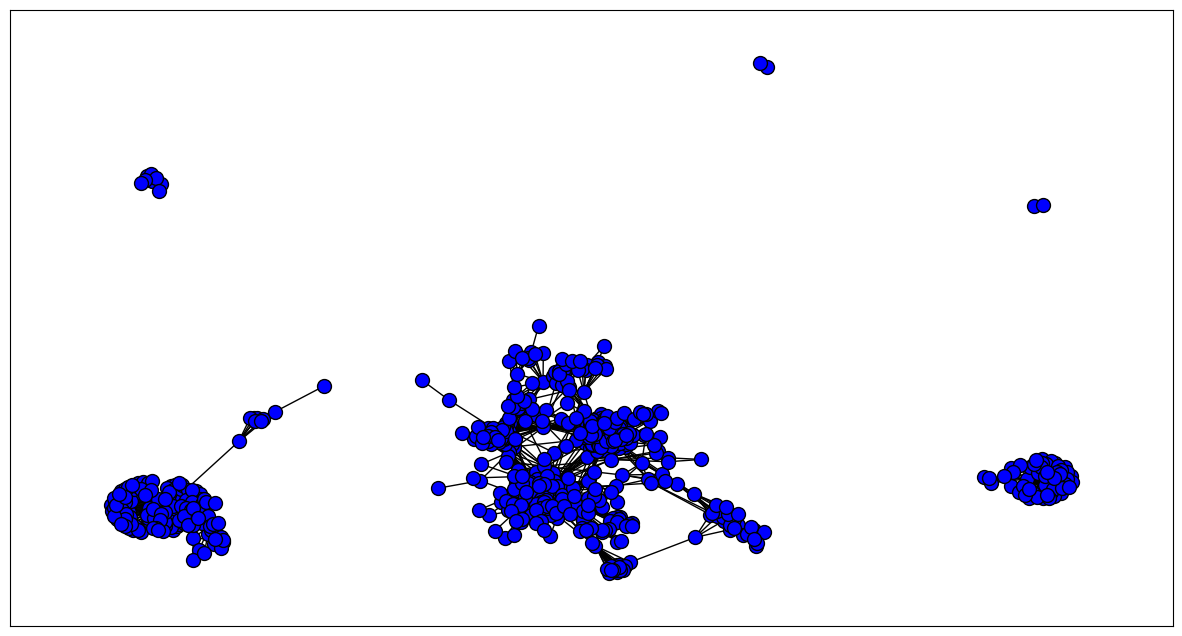

In [28]:
plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw_networkx(G2,pos=sp,node_color='blue',with_labels=False,edgecolors='black',node_size=100)
plt.show()

In [55]:
print(nx.info(G2))

Graph with 786 nodes and 4937 edges


C:\Users\DELL\AppData\Local\Temp\ipykernel_8752\265060720.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G2))


# Centrality measures

In [29]:
print(nx.degree_centrality(G2))


{686: 0.2165605095541401, 687: 0.0012738853503184713, 688: 0.0012738853503184713, 689: 0.0012738853503184713, 690: 0.0012738853503184713, 691: 0.0012738853503184713, 692: 0.0012738853503184713, 693: 0.0012738853503184713, 694: 0.0012738853503184713, 695: 0.0012738853503184713, 696: 0.0012738853503184713, 697: 0.058598726114649675, 698: 0.0025477707006369425, 699: 0.0012738853503184713, 700: 0.0012738853503184713, 701: 0.0025477707006369425, 702: 0.0012738853503184713, 703: 0.05095541401273885, 704: 0.0012738853503184713, 705: 0.003821656050955414, 706: 0.0012738853503184713, 707: 0.0012738853503184713, 708: 0.035668789808917196, 709: 0.003821656050955414, 710: 0.0012738853503184713, 711: 0.0012738853503184713, 712: 0.0012738853503184713, 713: 0.07770700636942675, 714: 0.0012738853503184713, 715: 0.0012738853503184713, 716: 0.0012738853503184713, 717: 0.0012738853503184713, 718: 0.0025477707006369425, 719: 0.07133757961783439, 720: 0.0025477707006369425, 721: 0.003821656050955414, 722: 

In [30]:
print(nx.betweenness_centrality(G2))


{686: 0.04805723246264404, 687: 0.0, 688: 0.0, 689: 0.0, 690: 0.0, 691: 0.0, 692: 0.0, 693: 0.0, 694: 0.0, 695: 0.0, 696: 0.0, 697: 0.0012138117496620924, 698: 0.0, 699: 0.0, 700: 0.0, 701: 0.0, 702: 0.0, 703: 0.0010686272869647531, 704: 0.0, 705: 2.4661183186291686e-07, 706: 0.0, 707: 0.0, 708: 0.0004947195646700545, 709: 2.4661183186291686e-07, 710: 0.0, 711: 0.0, 712: 0.0, 713: 0.001854965843097218, 714: 0.0, 715: 0.0, 716: 0.0, 717: 0.0, 718: 0.0, 719: 0.0013903628598723006, 720: 0.0, 721: 0.0, 722: 0.0, 723: 0.0, 724: 0.0, 725: 0.0, 726: 0.0, 727: 0.0, 728: 0.0, 729: 0.0011440993761157152, 730: 3.4638355416229594e-07, 731: 0.0, 732: 0.0, 733: 0.0, 734: 0.0, 735: 0.0, 736: 0.0, 737: 0.0, 738: 0.0, 739: 0.0, 740: 0.0, 741: 0.0, 742: 0.0, 743: 0.0, 744: 0.0, 745: 0.0005230610720633653, 746: 0.0, 747: 0.00124571676370136, 748: 4.497185522580813e-07, 749: 0.0, 750: 0.0, 751: 0.0, 752: 0.0, 753: 0.00037184181302593865, 754: 2.4661183186291686e-07, 755: 2.0310672039516444e-07, 756: 0.0, 

In [31]:
print(nx.closeness_centrality(G2))


{686: 0.21842097467041918, 687: 0.1156662796900003, 688: 0.1156662796900003, 689: 0.1156662796900003, 690: 0.1156662796900003, 691: 0.1156662796900003, 692: 0.1156662796900003, 693: 0.1156662796900003, 694: 0.1156662796900003, 695: 0.1156662796900003, 696: 0.1156662796900003, 697: 0.13455733396601757, 698: 0.11623888503500031, 699: 0.1156662796900003, 700: 0.1156662796900003, 701: 0.11623888503500031, 702: 0.1156662796900003, 703: 0.13191154369140484, 704: 0.1156662796900003, 705: 0.11681718794562221, 706: 0.1156662796900003, 707: 0.1156662796900003, 708: 0.1279577917006543, 709: 0.11681718794562221, 710: 0.1156662796900003, 711: 0.1156662796900003, 712: 0.1156662796900003, 713: 0.1369111065718371, 714: 0.1156662796900003, 715: 0.1156662796900003, 716: 0.1156662796900003, 717: 0.1156662796900003, 718: 0.11623888503500031, 719: 0.13494399297166704, 720: 0.1159518754423213, 721: 0.11652731899290354, 722: 0.11623888503500031, 723: 0.1156662796900003, 724: 0.11740127388535032, 725: 0.11566

In [32]:
print(nx.eigenvector_centrality(G2))


{686: 2.701245794146037e-07, 687: 1.216924663934183e-08, 688: 1.216924663934183e-08, 689: 1.216924663934183e-08, 690: 1.216924663934183e-08, 691: 1.216924663934183e-08, 692: 1.216924663934183e-08, 693: 1.216924663934183e-08, 694: 1.216924663934183e-08, 695: 1.216924663934183e-08, 696: 1.216924663934183e-08, 697: 1.4911507930542445e-07, 698: 1.8886955120493945e-08, 699: 1.216924663934183e-08, 700: 1.216924663934183e-08, 701: 1.8886955120493945e-08, 702: 1.216924663934183e-08, 703: 1.0537378400771132e-07, 704: 1.216924663934183e-08, 705: 2.3634096494726824e-08, 706: 1.216924663934183e-08, 707: 1.216924663934183e-08, 708: 1.1156946580848039e-07, 709: 2.3634096494726824e-08, 710: 1.216924663934183e-08, 711: 1.216924663934183e-08, 712: 1.216924663934183e-08, 713: 1.7447736198450726e-07, 714: 1.216924663934183e-08, 715: 1.216924663934183e-08, 716: 1.216924663934183e-08, 717: 1.216924663934183e-08, 718: 1.69163880135747e-08, 719: 1.7306477402550858e-07, 720: 1.9965900778136213e-08, 721: 2.674

# Build the Evaluation Matrix

In [33]:
    betCent = nx.betweenness_centrality(G2)
    closCent = nx.closeness_centrality(G2)
    degCent = nx.degree_centrality(G2)
    eigCent = nx.eigenvector_centrality(G2)


    BC = []
    DC = []
    EC = []
    CC = []
    Node = []

    for i in sorted(betCent):
        BC.append(betCent[i])
        Node.append(i)

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

   
    Matrix = pd.DataFrame({'Node' : Node,
                        'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})
    Matrix

,Node,DC,CC,BC,EC
0,686,0.216561,0.218421,0.048057,2.701246e-07
1,687,0.001274,0.115666,0.000000,1.216925e-08
2,688,0.001274,0.115666,0.000000,1.216925e-08
3,689,0.001274,0.115666,0.000000,1.216925e-08
4,690,0.001274,0.115666,0.000000,1.216925e-08
...,...,...,...,...,...
781,4034,0.001274,0.037264,0.000000,9.467784e-24
782,4035,0.001274,0.037264,0.000000,9.467784e-24
783,4036,0.001274,0.037264,0.000000,9.467784e-24
784,4037,0.001274,0.037264,0.000000,9.467784e-24


In [34]:
# Save the Matrix as a csv file
Matrix.to_csv("Data/MatrixComm2.csv", index=False)

In [35]:
# Convert Matrix to numpy array
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[2.16560510e-01, 4.80572325e-02, 2.18420975e-01, 2.70124579e-07],
       [1.27388535e-03, 0.00000000e+00, 1.15666280e-01, 1.21692466e-08],
       [1.27388535e-03, 0.00000000e+00, 1.15666280e-01, 1.21692466e-08],
       ...,
       [1.27388535e-03, 0.00000000e+00, 3.72639158e-02, 9.46778441e-24],
       [1.27388535e-03, 0.00000000e+00, 3.72639158e-02, 9.46778441e-24],
       [3.82165605e-03, 1.08323584e-06, 3.79234541e-02, 1.31636202e-23]])

# Call Topsis class 

In [36]:
# Decision Matrix
Evaluation_matrix = Matrix_arr

In [37]:
from topsis import Topsis

weights = [0.2, 0.3 , 0.3, 0.2]

criteria = np.array([True,True,True,True])

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[2.16560510e-01 4.80572325e-02 2.18420975e-01 2.70124579e-07]
 [1.27388535e-03 0.00000000e+00 1.15666280e-01 1.21692466e-08]
 [1.27388535e-03 0.00000000e+00 1.15666280e-01 1.21692466e-08]
 ...
 [1.27388535e-03 0.00000000e+00 3.72639158e-02 9.46778441e-24]
 [1.27388535e-03 0.00000000e+00 3.72639158e-02 9.46778441e-24]
 [3.82165605e-03 1.08323584e-06 3.79234541e-02 1.31636202e-23]]

Step 2
 [[3.25881056e-01 3.26086994e-01 4.71859268e-02 2.70124579e-07]
 [1.91694739e-03 0.00000000e+00 2.49876213e-02 1.21692466e-08]
 [1.91694739e-03 0.00000000e+00 2.49876213e-02 1.21692466e-08]
 ...
 [1.91694739e-03 0.00000000e+00 8.05019942e-03 9.46778441e-24]
 [1.91694739e-03 0.00000000e+00 8.05019942e-03 9.46778441e-24]
 [5.75084216e-03 7.35017606e-06 8.19268083e-03 1.31636202e-23]]

Step 3
 [[6.51762112e-02 9.78260982e-02 1.41557780e-02 5.40249159e-08]
 [3.83389477e-04 0.00000000e+00 7.49628640e-03 2.43384933e-09]
 [3.83389477e-04 0.00000000e+00 7.49628640e-03 2.43384933e-09]
 ...
 [3.83389477

# Determin S+ and S-

In [38]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.05655061 0.15482867 0.15482867 0.15482867 0.15482867 0.15482867
 0.15482867 0.15482867 0.15482867 0.15482867 0.15482867 0.1461483
 0.15466628 0.15482867 0.15482867 0.15466628 0.15482867 0.14718579
 0.15482867 0.15450422 0.15482867 0.15482867 0.14985144 0.15450422
 0.15482867 0.15482867 0.15482867 0.14319041 0.15482867 0.15482867
 0.15482867 0.15482867 0.15466628 0.144621   0.15466745 0.15450583
 0.15450701 0.15482867 0.1541861  0.15482867 0.15434617 0.15450583
 0.15450583 0.15106163 0.15450286 0.15434617 0.15482867 0.15466745
 0.15450701 0.15482867 0.15466745 0.15466745 0.15466745 0.15466628
 0.15482867 0.15466628 0.15466745 0.15482867 0.15482867 0.14831719
 0.15466745 0.14621542 0.15418531 0.15482867 0.15482867 0.15450701
 0.15418729 0.15242423 0.15434455 0.15434463 0.15466745 0.15482867
 0.15434579 0.15450583 0.15402765 0.15482867 0.15434735 0.15466628
 0.15434617 0.15434455 0.15434617 0.15482867 0.15466745 0.15257103
 0.15466628 0.15482867 0.15303223 0.15418729 0.1

In [39]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [0.67635232 0.04569537 0.04569537 0.04569537 0.04569537 0.04569537
 0.04569537 0.04569537 0.04569537 0.04569537 0.04569537 0.11746224
 0.0460176  0.04569537 0.04569537 0.0460176  0.04569537 0.10528513
 0.04569537 0.04645679 0.04569537 0.04569537 0.081241   0.04645679
 0.04569537 0.04569537 0.04569537 0.14820351 0.04569537 0.04569537
 0.04569537 0.04569537 0.0460176  0.13706838 0.04590795 0.04634633
 0.04623653 0.04569537 0.04745147 0.04569537 0.04678868 0.04634633
 0.04634633 0.05753712 0.0465677  0.04678868 0.04569537 0.04590795
 0.04623653 0.04569537 0.04590795 0.04590795 0.04590795 0.0460176
 0.04569537 0.0460176  0.04590795 0.04569537 0.04569537 0.10163274
 0.04590795 0.11564923 0.0474517  0.04569537 0.04569537 0.04623653
 0.0473417  0.05559971 0.046899   0.04689898 0.04590795 0.04569537
 0.04678879 0.04634633 0.04811086 0.04569537 0.04667902 0.0460176
 0.04678868 0.046899   0.04678868 0.04569537 0.04590795 0.05650974
 0.0460176  0.04569537 0.05509871 0.0473417  0

In [40]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.32364768 0.95430463 0.95430463 0.95430463 0.95430463 0.95430463
 0.95430463 0.95430463 0.95430463 0.95430463 0.95430463 0.88253776
 0.9539824  0.95430463 0.95430463 0.9539824  0.95430463 0.89471487
 0.95430463 0.95354321 0.95430463 0.95430463 0.918759   0.95354321
 0.95430463 0.95430463 0.95430463 0.85179649 0.95430463 0.95430463
 0.95430463 0.95430463 0.9539824  0.86293162 0.95409205 0.95365367
 0.95376347 0.95430463 0.95254853 0.95430463 0.95321132 0.95365367
 0.95365367 0.94246288 0.9534323  0.95321132 0.95430463 0.95409205
 0.95376347 0.95430463 0.95409205 0.95409205 0.95409205 0.9539824
 0.95430463 0.9539824  0.95409205 0.95430463 0.95430463 0.89836726
 0.95409205 0.88435077 0.9525483  0.95430463 0.95430463 0.95376347
 0.9526583  0.94440029 0.953101   0.95310102 0.95409205 0.95430463
 0.95321121 0.95365367 0.95188914 0.95430463 0.95332098 0.9539824
 0.95321132 0.953101   0.95321132 0.95430463 0.95409205 0.94349026
 0.9539824  0.95430463 0.94490129 0.9526583  0.

In [41]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

#print(type(Best_Dist))
#print(len(Best_Dist))

# Calculate Closness 

In [42]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [43]:
Closnness
#print(len(Closnness))

array([0.67635232, 0.04569537, 0.04569537, 0.04569537, 0.04569537,
       0.04569537, 0.04569537, 0.04569537, 0.04569537, 0.04569537,
       0.04569537, 0.11746224, 0.0460176 , 0.04569537, 0.04569537,
       0.0460176 , 0.04569537, 0.10528513, 0.04569537, 0.04645679,
       0.04569537, 0.04569537, 0.081241  , 0.04645679, 0.04569537,
       0.04569537, 0.04569537, 0.14820351, 0.04569537, 0.04569537,
       0.04569537, 0.04569537, 0.0460176 , 0.13706838, 0.04590795,
       0.04634633, 0.04623653, 0.04569537, 0.04745147, 0.04569537,
       0.04678868, 0.04634633, 0.04634633, 0.05753712, 0.0465677 ,
       0.04678868, 0.04569537, 0.04590795, 0.04623653, 0.04569537,
       0.04590795, 0.04590795, 0.04590795, 0.0460176 , 0.04569537,
       0.0460176 , 0.04590795, 0.04569537, 0.04569537, 0.10163274,
       0.04590795, 0.11564923, 0.0474517 , 0.04569537, 0.04569537,
       0.04623653, 0.0473417 , 0.05559971, 0.046899  , 0.04689898,
       0.04590795, 0.04569537, 0.04678879, 0.04634633, 0.04811

In [44]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])

In [45]:
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.056551,0.118178,0.676352
1,0.154829,0.007414,0.045695
2,0.154829,0.007414,0.045695
3,0.154829,0.007414,0.045695
4,0.154829,0.007414,0.045695
...,...,...,...
781,0.155233,0.002332,0.014803
782,0.155233,0.002332,0.014803
783,0.155233,0.002332,0.014803
784,0.155233,0.002332,0.014803


In [46]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("Data/OutComm2.csv",index=False)

In [47]:
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]

In [48]:
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C

[363,
 582,
 0,
 281,
 462,
 305,
 387,
 355,
 668,
 478,
 438,
 376,
 687,
 326,
 590,
 430,
 370,
 552,
 248,
 557,
 544,
 206,
 534,
 576,
 302,
 553,
 399,
 212,
 241,
 710,
 274,
 676,
 680,
 492,
 335,
 714,
 619,
 364,
 213,
 486,
 288,
 652,
 459,
 278,
 610,
 445,
 704,
 525,
 317,
 547,
 588,
 345,
 608,
 696,
 489,
 256,
 343,
 220,
 485,
 394,
 611,
 510,
 727,
 307,
 384,
 420,
 594,
 536,
 634,
 236,
 27,
 337,
 225,
 371,
 287,
 266,
 603,
 319,
 257,
 271,
 230,
 719,
 627,
 656,
 352,
 33,
 328,
 512,
 573,
 309,
 580,
 577,
 369,
 286,
 315,
 641,
 502,
 428,
 517,
 674,
 464,
 565,
 232,
 203,
 514,
 548,
 597,
 386,
 313,
 223,
 214,
 388,
 401,
 663,
 442,
 518,
 683,
 604,
 216,
 11,
 671,
 581,
 318,
 623,
 61,
 332,
 349,
 360,
 404,
 251,
 268,
 539,
 593,
 681,
 563,
 435,
 265,
 235,
 578,
 246,
 289,
 447,
 450,
 272,
 245,
 693,
 574,
 650,
 294,
 247,
 583,
 358,
 699,
 665,
 513,
 416,
 716,
 215,
 432,
 712,
 392,
 493,
 695,
 323,
 533,
 17,
 229,
 585,

In [49]:
#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

[3604,
 3830,
 686,
 3521,
 3705,
 3545,
 3628,
 3596,
 3918,
 3722,
 3680,
 3617,
 3938,
 3566,
 3838,
 3672,
 3611,
 3799,
 3488,
 3804,
 3790,
 3442,
 3780,
 3824,
 3542,
 3800,
 3640,
 3448,
 3480,
 3962,
 3514,
 3926,
 3930,
 3737,
 3576,
 3966,
 3869,
 3605,
 3449,
 3731,
 3528,
 3902,
 3702,
 3518,
 3860,
 3687,
 3956,
 3771,
 3557,
 3793,
 3836,
 3586,
 3858,
 3948,
 3734,
 3496,
 3584,
 3459,
 3730,
 3635,
 3861,
 3756,
 3980,
 3547,
 3625,
 3662,
 3842,
 3782,
 3884,
 3475,
 713,
 3578,
 3464,
 3612,
 3527,
 3506,
 3851,
 3559,
 3497,
 3511,
 3469,
 3971,
 3877,
 3906,
 3593,
 719,
 3568,
 3758,
 3821,
 3549,
 3828,
 3825,
 3610,
 3526,
 3555,
 3891,
 3747,
 3670,
 3763,
 3924,
 3707,
 3812,
 3471,
 3438,
 3760,
 3794,
 3845,
 3627,
 3553,
 3462,
 3450,
 3629,
 3642,
 3913,
 3684,
 3764,
 3933,
 3852,
 3455,
 697,
 3921,
 3829,
 3558,
 3873,
 747,
 3573,
 3590,
 3601,
 3645,
 3491,
 3508,
 3785,
 3841,
 3931,
 3810,
 3677,
 3505,
 3474,
 3826,
 3485,
 3529,
 3690,
 3693,
 351

In [50]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("Data/TopsisComm2.csv",index=False)

# The nodes depending on the relative closeness to the ideal solution

In [51]:
Final_Tab = pd.concat([pd.read_csv("Data/OutComm2.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.038454,0.142088,0.787010,3604
1,0.047809,0.128745,0.729210,3830
2,0.056551,0.118178,0.676352,686
3,0.079416,0.084373,0.515132,3521
4,0.091859,0.073181,0.443414,3705
5,0.095394,0.071124,0.427126,3545
6,0.101845,0.062259,0.379388,3628
7,0.106434,0.063799,0.374776,3596
8,0.103636,0.058976,0.362678,3918
9,0.112790,0.047034,0.294284,3722


In [53]:
res = pd.concat([pd.read_csv("Data/MatrixComm2.csv"),pd.read_csv("Data/OutComm2.csv")],axis=1)
res

,Node,DC,CC,BC,EC,S+,S-,C
0,686,0.216561,0.218421,0.048057,2.701246e-07,0.038454,0.142088,0.787010
1,687,0.001274,0.115666,0.000000,1.216925e-08,0.047809,0.128745,0.729210
2,688,0.001274,0.115666,0.000000,1.216925e-08,0.056551,0.118178,0.676352
3,689,0.001274,0.115666,0.000000,1.216925e-08,0.079416,0.084373,0.515132
4,690,0.001274,0.115666,0.000000,1.216925e-08,0.091859,0.073181,0.443414
...,...,...,...,...,...,...,...,...
781,4034,0.001274,0.037264,0.000000,9.467784e-24,0.155122,0.000818,0.005246
782,4035,0.001274,0.037264,0.000000,9.467784e-24,0.155473,0.000000,0.000000
783,4036,0.001274,0.037264,0.000000,9.467784e-24,0.155473,0.000000,0.000000
784,4037,0.001274,0.037264,0.000000,9.467784e-24,0.155473,0.000000,0.000000


In [54]:
# Save the res as a csv file
res.to_csv("Data/resComm2.csv", index=False)

# User

In [52]:
K = int(input("Enter the number of the top influential nodes:"))

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

Enter the number of the top influential nodes:3
The 1 top influential node is  3604
The 2 top influential node is  3830
The 3 top influential node is  686
